<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine-Learning-End_to_end_project/blob/main/titanic_eda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Titanic.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [3]:
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [5]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

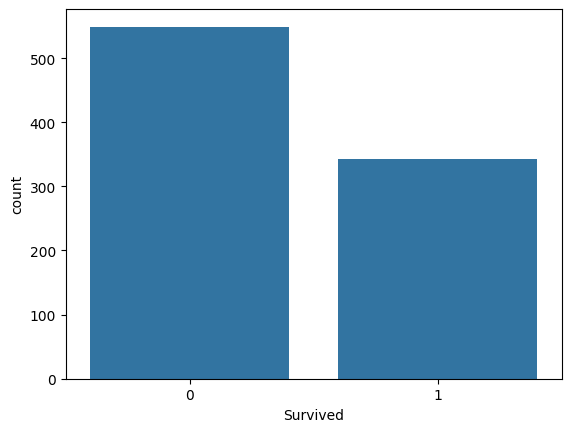

In [11]:
sns.countplot(x='Survived',data=df)

In [12]:
display(df['Survived'].value_counts())

,count
Survived,
0,549
1,342


In [13]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

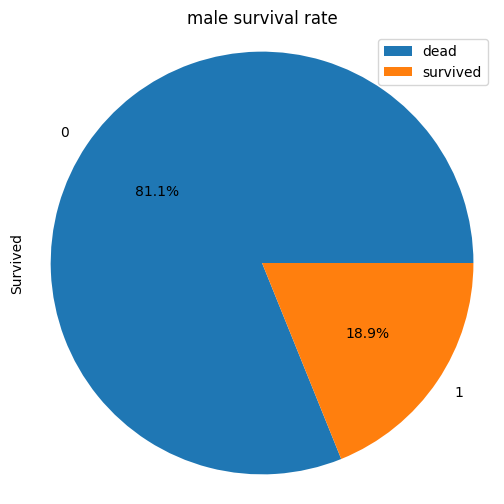

In [18]:
df[df['Sex']=='male'].Survived.groupby(df.Survived).count().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%')
plt.axis('equal')
plt.title('male survival rate')
plt.legend(['dead','survived'])
plt.show()

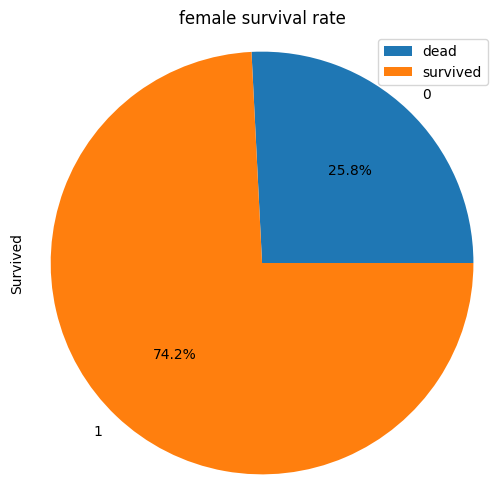

In [17]:
df[df['Sex']=='female'].Survived.groupby(df.Survived).count().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%')
plt.axis('equal')
plt.legend(['dead','survived'])
plt.title('female survival rate')
plt.show()

In [20]:
pd.crosstab(df.Pclass,df.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/tmp/ipython-input-368014665.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(['dead'],['survived'])


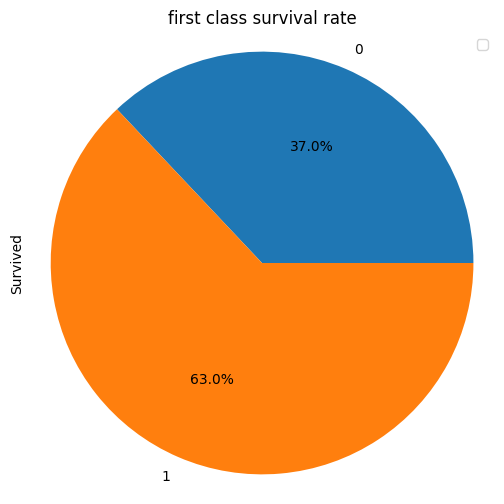

In [21]:
df[df['Pclass']==1].Survived.groupby(df.Survived).count().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%')
plt.axis('equal')
plt.legend(['dead'],['survived'])
plt.title("first class survival rate")
plt.show()

/tmp/ipython-input-357511025.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(['dead'],['survived'])


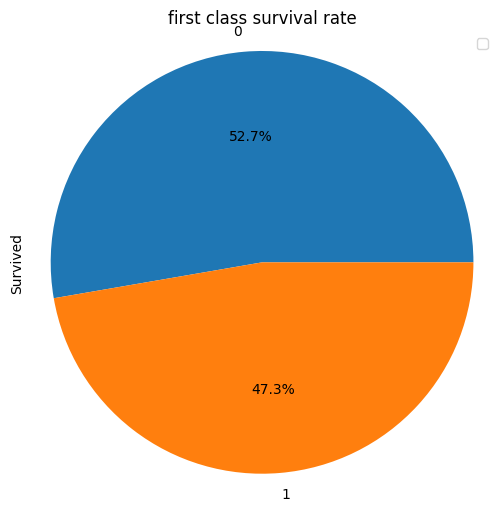

In [22]:
df[df['Pclass']==2].Survived.groupby(df.Survived).count().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%')
plt.axis('equal')
plt.legend(['dead'],['survived'])
plt.title("first class survival rate")
plt.show()

/tmp/ipython-input-3745364973.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(['dead'],['survived'])


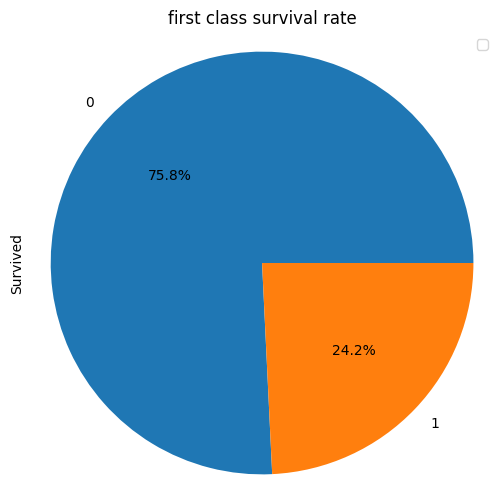

In [23]:
df[df['Pclass']==3].Survived.groupby(df.Survived).count().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%')
plt.axis('equal')
plt.legend(['dead'],['survived'])
plt.title("first class survival rate")
plt.show()

In [26]:
pd.crosstab([df.Pclass,df.Sex],df.Survived,margins=True)

Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891

<Axes: xlabel='Pclass', ylabel='Survived'>

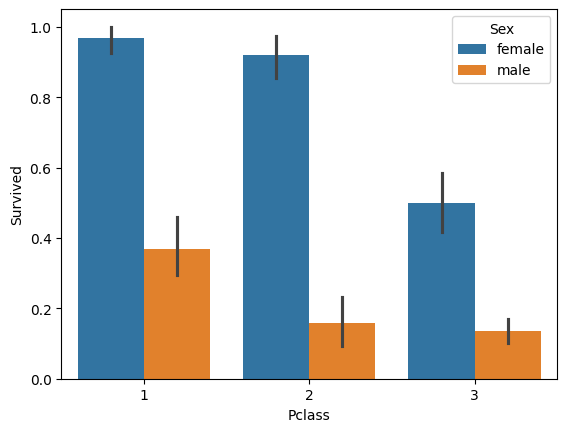

In [28]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

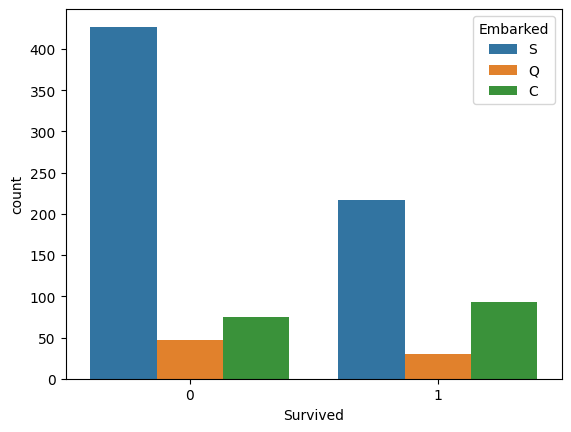

In [30]:
sns.countplot(x='Survived',data=df,hue='Embarked')

In [32]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [33]:
df.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
881,0,3,"Markun, Mr. Johann",male,33.0,0,0,7.8958,NaN,S
882,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,10.5167,NaN,S
883,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,10.5000,NaN,S
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.7500,NaN,Q


<Axes: xlabel='Pclass', ylabel='Fare'>

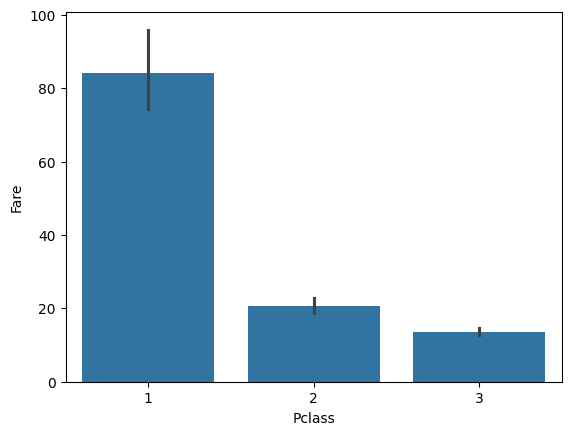

In [35]:
sns.barplot(x='Pclass',y='Fare',data=df)


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Survived', ylabel='Fare'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


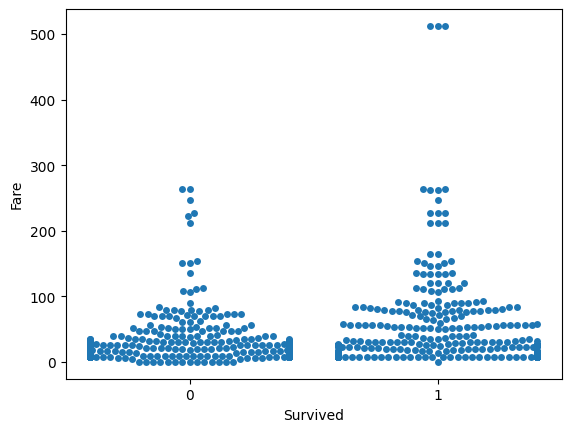

In [36]:
sns.swarmplot(x='Survived',y='Fare',data=df)

<Axes: xlabel='Pclass', ylabel='Fare'>

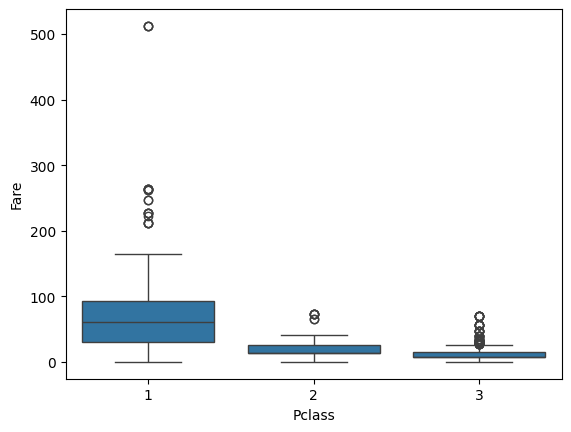

In [37]:
sns.boxplot(x='Pclass',y='Fare',data=df)

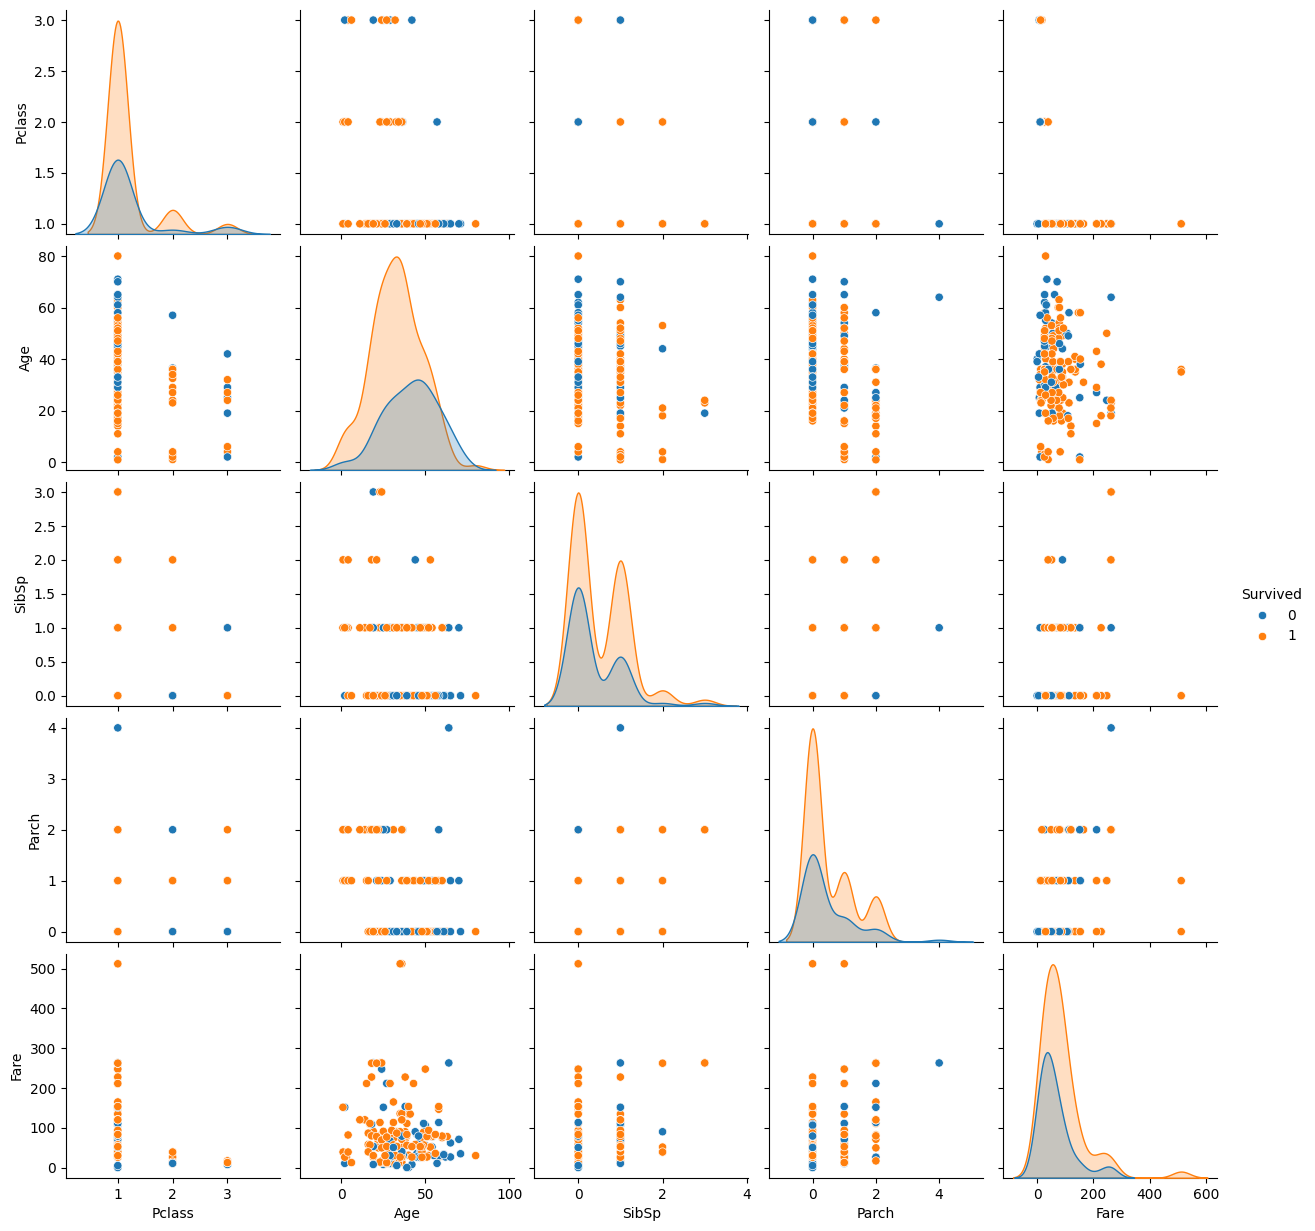

In [38]:
sns.pairplot(df.drop('Name',axis=1).dropna(),hue='Survived')

In [42]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
480,0,3,"Goodwin, Master. Harold Victor",male,9.00,5,2,46.9000,NaN,S
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,19.2583,NaN,C
69,0,3,"Kink, Mr. Vincenz",male,26.00,2,0,8.6625,NaN,S
63,0,3,"Skoog, Master. Harald",male,4.00,3,2,27.9000,NaN,S
608,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.00,1,2,41.5792,NaN,C


In [49]:
df['Category'] = df['Name'].apply(rxtract)
display(df['Category'].unique())

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Dr'], dtype=object)

In [47]:
def extract(x):
  temp = x.split(' ')
  if 'Mr.' in temp:
    return 'Mr'
  elif 'Miss.' in temp:
    return 'Miss'
  elif 'Mrs.' in temp:
    return 'Mrs'
  elif 'Master.' in temp:
    return 'Master'
  elif 'Dr.' in temp:
    return 'Dr'
  else:
    return 'Others'